 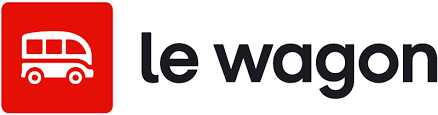

# CO2 and temperature

a) Download [`temperature_gaz_dataset.xlsx`](https://docs.google.com/spreadsheets/d/17swNTF9NSX14I05mfLpqTcvfxxxcTeej/edit?usp=sharing&ouid=101172426362035713447&rtpof=true&sd=true) and upload it to Google Colab.

b) Execute cell below to load data.

In [1]:
import pandas as pd

# load data
temperature = pd.read_excel("temperature_gaz_dataset.xlsx", sheet_name="temperature", dtype={'date_date': int})
co2 = pd.read_excel("temperature_gaz_dataset.xlsx", sheet_name="co2", dtype={'date_date': int})
ch4 = pd.read_excel("temperature_gaz_dataset.xlsx", sheet_name="ch4", dtype={'date_date': int})
no2 = pd.read_excel("temperature_gaz_dataset.xlsx", sheet_name="no2", dtype={'date_date': int})

Temperature values are delta values in comparison with the average calculated on base period 1951-1980 as per source NASA GISS GLOBAL Land-Ocean Temperature Index

In [23]:
print(temperature)

     date_date  temperature
0         2015     0.870000
1         2014     0.740000
2         2013     0.650000
3         2012     0.630000
4         2011     0.600000
..         ...          ...
610    -784050    -0.563657
611    -787050    -0.991467
612    -790050    -1.155061
613    -793050    -2.457660
614    -796050    -1.684176

[615 rows x 2 columns]


c) We want to find a common date range period between the four dataframes.

What is the maximum of the minimum dates and the minimum of the maximum dates?

Store it in `min_date_date` and `max_date_date` variables.

<details>
    <summary><i>Hint:</i></summary>

min() function can take several arguments.
</details>   

In [25]:
#maximum of the minimum dates
min_date_date = max(temperature.date_date.min(), co2.date_date.min(), ch4.date_date.min(), no2.date_date.min())
#minimum of the maximum dates
max_date_date = min(temperature.date_date.max(), co2.date_date.max(), ch4.date_date.max(), no2.date_date.max())

print (f'min date is',min_date_date, f'and max date is',max_date_date)

min date is -796050 and max date is 2015


d) Create a DataFrame `df_all` of one column "date_date" with years between `min_date_date` and `max_date_date`.

<details>
    <summary><i>Hint:</i></summary>

You can use `list(range( , ))` for values
</details>   

In [43]:
#Create DataFrame of years btween min and max date
df_all = pd.DataFrame(list(range(min_date_date, max_date_date + 1)), columns=['date_date'])
df_all

,date_date
0,-796050
1,-796049
2,-796048
3,-796047
4,-796046
...,...
798061,2011
798062,2012
798063,2013
798064,2014


e) Using `merge` function, merge all dataframes into `df_all`.
You should end with a DataFrame of 5 columns: "date_date", "temperature", "co2", "ch4" and "no2".

<details>
    <summary><i>Solution:</i></summary>

df_all = df_all.merge(temperature, how="left", on="date_date")
</details>   

In [44]:
#Merge all dataframes
df_all = df_all.merge(temperature, how="left", on="date_date")
df_all = df_all.merge(co2, how="left", on="date_date")
df_all = df_all.merge(ch4, how="left", on="date_date")
df_all = df_all.merge(no2, how="left", on="date_date")
df_all

,date_date,temperature,co2,ch4,no2
0,-796050,-1.684176,NaN,NaN,NaN
1,-796049,NaN,NaN,NaN,NaN
2,-796048,NaN,NaN,NaN,NaN
3,-796047,NaN,NaN,NaN,NaN
4,-796046,NaN,NaN,NaN,NaN
...,...,...,...,...,...
798061,2011,0.600000,391.63,1803.14,323.352333
798062,2012,0.630000,393.82,1808.03,324.395083
798063,2013,0.650000,396.48,1813.43,325.219667
798064,2014,0.740000,398.61,1822.61,326.198333


f) We want to interpolate NaN values. Use the `interpolate()` pandas function to fill nan values with linear interpolation. After this interpolation, you will see that we still have missing values at the head of the dataframe. For these values, we can apply a second interpolate function with the backfill method.

<details>
    <summary><i>Solution:</i></summary>

df_all = df_all.interpolate().interpolate(method="backfill")
</details>   

In [46]:
#interpolate Nan Values
df_all = df_all.interpolate().interpolate(method="backfill")
df_all

<ipython-input-46-e72ef4d0844d>:2: FutureWarning: DataFrame.interpolate with method=backfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_all = df_all.interpolate().interpolate(method="backfill")


,date_date,temperature,co2,ch4,no2
0,-796050,-1.684176,188.40,396.00,248.800000
1,-796049,-1.684434,188.40,396.00,248.800000
2,-796048,-1.684692,188.40,396.00,248.800000
3,-796047,-1.684950,188.40,396.00,248.800000
4,-796046,-1.685208,188.40,396.00,248.800000
...,...,...,...,...,...
798061,2011,0.600000,391.63,1803.14,323.352333
798062,2012,0.630000,393.82,1808.03,324.395083
798063,2013,0.650000,396.48,1813.43,325.219667
798064,2014,0.740000,398.61,1822.61,326.198333


# Short term analysis

a) In a new `df_all_last_150` variable, select last 150 rows of `df_all`.

<details>
    <summary><i>Hint:</i></summary>
use iloc function with negative index
</details>  


<details>
    <summary><i>Solution:</i></summary>
df_all_last_150 = df_all.iloc[-150:, :]
</details>  

In [47]:
#Last 150 rows of df_all
df_all_last_150 = df_all.iloc[-150:, :]
df_all_last_150

,date_date,temperature,co2,ch4,no2
797916,1866,-0.18250,287.725,829.716814,273.195122
797917,1867,-0.18375,288.250,830.805310,273.343902
797918,1868,-0.18500,288.775,831.893805,273.492683
797919,1869,-0.18625,289.300,832.982301,273.641463
797920,1870,-0.18750,288.200,834.070796,273.790244
...,...,...,...,...,...
798061,2011,0.60000,391.630,1803.140000,323.352333
798062,2012,0.63000,393.820,1808.030000,324.395083
798063,2013,0.65000,396.480,1813.430000,325.219667
798064,2014,0.74000,398.610,1822.610000,326.198333


b) Calculate matrix of correlation between ["temperature", "co2", "ch4", "no2"] columns.

What do you see? Is there any correlation between temperature and other features?

In [48]:
#Matirix correlation
df_all_last_150[["temperature", "co2", "ch4", "no2"]].corr()

,temperature,co2,ch4,no2
temperature,1.000000,0.928968,0.885056,0.925038
co2,0.928968,1.000000,0.950862,0.997823
ch4,0.885056,0.950862,1.000000,0.964885
no2,0.925038,0.997823,0.964885,1.000000


<details>
    <summary><i>Solution:</i></summary>
Temperature is highly correlated with other features!
</details>

c) With `plotly.express` plot temperature evolution.

What do you see? Is it going up?

In [49]:
#plot temperature evolution
import plotly.express as px
fig = px.line(df_all_last_150, x="date_date", y="temperature")
fig.show()

<details>
    <summary><i>Solution:</i></summary>
Temperatures have risen rapidly over the last century and the situation is getting worse.
</details>

d) Perform a linear regression between temperature and co2.

Calcule regression score.

Be careful to split your data between train and test.

Which score do you obtain? Does co2 predict well temperature? Is it perfect?

<details>
    <summary><i>Solution:</i></summary>

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df_all_last_150[["co2"]]
y = df_all_last_150[["temperature"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

reg.score(X_test, y_test)
</details>

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#X
X = df_all_last_150[["co2"]]
#y
y = df_all_last_150[["temperature"]]
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#regression
reg = LinearRegression().fit(X_train, y_train)
#score
reg.score(X_test, y_test)

0.8469155624334688

<details>
    <summary><i>Solution:</i></summary>


The default scoring for a linear regression is the Adjusted R². The score on both train ad test set is 0.86. It's a very good score, co2 is a good feature to predict temperature.
We need extra features to perfectly predict the temperature, co2 is one among many. But co2 alone explains already a lot!
</details>

e) [BONUS] Take back `df_all_last_150` variable and make a linear regression on co2, ch4 and no2.

Is the result better? Why?

In [57]:
#X
X = df_all_last_150[["co2", "ch4", "no2"]]
#y
y = df_all_last_150[["temperature"]]
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#regression
reg = LinearRegression().fit(X_train, y_train)
#score
reg.score(X_test, y_test)

0.8303708965432888

<details>
    <summary><i>Solution:</i></summary>
The result is not better, this is due to the fact that features are highly inter-correlated. Is there no2 because there is co2 or vice versa?  
</details>  

# Long term analysis

a) Starting from the `df_all` dataframe, recalculate the correlation matrix but on over the whole period. Are those features correlated when we look at the whole period?

In [58]:
#correlation matrix
df_all[["temperature", "co2", "ch4", "no2"]].corr()

,temperature,co2,ch4,no2
temperature,1.000000,0.699641,0.693988,0.566816
co2,0.699641,1.000000,0.792153,0.682131
ch4,0.693988,0.792153,1.000000,0.711314
no2,0.566816,0.682131,0.711314,1.000000


<details>
    <summary><i>Solution:</i></summary>
Yes, there is still a high correlation, but lower. Let's try to understand why.

</details>  

b) Plot temperature evolution since the beginning.

For that you need to subsample data to not overload Plotly.

What does this instruction do?

In [66]:
#I prefer this scale in order to have a better visual
df_50 = df_all[df_all.date_date % 50 == 0]
df_all_last_30 = df_50.iloc[-30:, :]
df_all_last_30

,date_date,temperature,co2,ch4,no2
796600,550,0.0800,278.273786,638.182927,262.241489
796650,600,0.0800,277.400000,649.768293,261.018085
796700,650,0.0650,277.955556,635.000000,262.129952
796750,700,0.0500,278.511111,635.000000,264.062319
796800,750,0.0550,278.287500,643.200000,265.994686
796850,800,0.0600,277.745161,643.788235,267.927053
796900,850,0.0650,278.497849,635.200000,266.189130
796950,900,0.0700,278.872727,634.527273,262.004348
797000,950,0.0450,277.736364,635.406593,261.536957
797050,1000,0.0200,276.600000,635.956044,262.243478


<details>
    <summary><i>Solution:</i></summary>
Each year which is a multiple of 50 is kept. So one temperature value every 50 years.
</details>  

c) Plot temperature evolution with plotly.express with df_all downsampled.

What do you see?


<details>
    <summary><i>Solution:</i></summary>

import plotly.express as px

fig = px.line(df_all[df_all.date_date % 50 == 0], x="date_date", y="temperature")
fig.show()
</details>  

In [67]:
#plot temperature
fig = px.line(df_all_last_30, x="date_date", y="temperature")
fig.show()

<details>
    <summary><i>Solution:</i></summary>

We see a cyclical pattern, with different glacial and interglacial periods, due to slow changes in the tilt of the Earth's axis and its orbit around the Sun (🔗 [orbital forcing](https://en.wikipedia.org/wiki/Orbital_forcing)).
During the 🔗 [Last Glacial Maximum](https://en.wikipedia.org/wiki/Last_Glacial_Maximum), around 20,000 years ago, Northern Europe was covered with ice sheets, up to Germany and Poland. The whole of Canada est to the Rocky Mountains and parts of the USA were also covered in ice.
We are currently in a warm period, a so-called interglacial period (the 🔗 [Holocene](https://en.wikipedia.org/wiki/Holocene) in this case) which started around 11,700 years ago.
In modern times, we now see that it is human activities that are a driving factor for rising global temperatures.
</details>  